In [1]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

\begin{equation*}
 \begin{cases}
 \dot x = ax - bxy\\
 \dot y = cxy - dy
 \end{cases}
\end{equation*}

In [8]:
a = 30
b = 2
c = 2
d = 30

In [9]:
def f1(x, y, t):
    return a*x- b*x*y
def f2(x, y, t):
    return c*x*y- d*y

In [10]:
def rk2_solve(f_1, f_2, t_start, t_end, x_start, y_start, N, alpha=0.75):
    x_s = []
    y_s = []
    t_s = []
    
    h = (t_end - t_start)/N

    t_s.append(t_start)
    x_s.append(x_start)
    y_s.append(y_start)
    
    x_shift = 0
    y_shift = 0
    t_shift = 0
    
    for i in range(1, N+1):
        t_s.append(t_start + i*h)
        
        f_1i = f_1(t=t_s[i-1], x=x_s[i-1], y=y_s[i-1])
        f_2i = f_2(t=t_s[i-1], x=x_s[i-1], y=y_s[i-1])
        
        x_shift = x_s[i-1] + (h/(2*alpha))*f_1i
        y_shift = y_s[i-1] + (h/(2*alpha))*f_2i
        t_shift = t_s[i-1] + (h/(2*alpha))
   
        x_s.append(x_s[i-1] + h*((1-alpha)*f_1i + alpha*f_1(t=t_shift, x=x_shift, y=y_shift)))
        y_s.append(y_s[i-1] + h*((1-alpha)*f_2i + alpha*f_2(t=t_shift, x=x_shift, y=y_shift)))

    return t_s, x_s, y_s


In [11]:
N = 1000

x_start = 5.1
y_start = 4.9
t_start = 0
t_end = 10

res_t, res_x, res_y = rk2_solve(f1, f2, t_start, t_end, x_start, y_start, N)

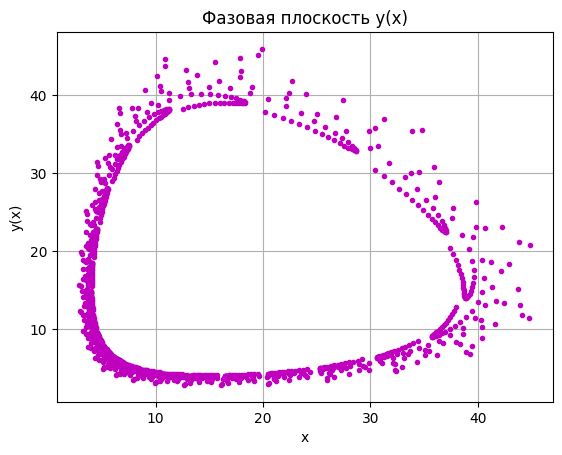

In [12]:
plt.plot(res_x, res_y, 'm.')
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Фазовая плоскость y(x)')
plt.show()

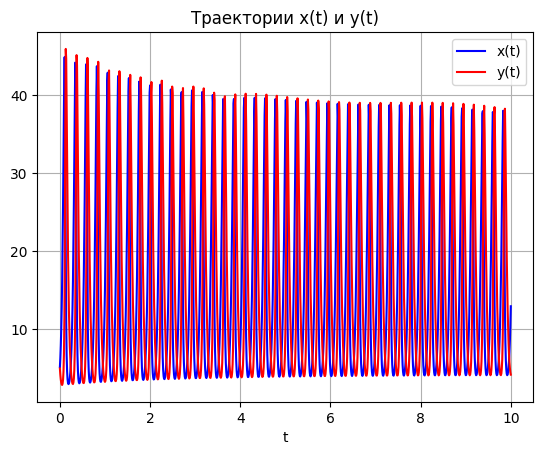

In [13]:

plt.plot(res_t, res_x, 'b', label='x(t)')
plt.plot(res_t, res_y, 'r', label='y(t)')
plt.grid()
plt.xlabel('t')
plt.title('Траектории x(t) и y(t)')
plt.legend()
plt.show()